In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pylab 

pylab.rcParams['figure.figsize'] = (16.0, 14.0)

import psycopg2
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.collections import LineCollection
#import pyproj.Proj as proj

import numpy as np

#from shapely import wkb

from osgeo import gdal
from osgeo import ogr
gdal.UseExceptions()

import time
import base64

In [2]:
def loadGeotiffAsMaskedArray(filename, band=1):
    t = time.time()
    print "Opening " + filename
    #Open using GDAL
    ds = gdal.Open(filename)
    band = ds.GetRasterBand(band)
    arr = np.ma.masked_array(band.ReadAsArray())
    
    #Compute extent for printing
    geoTransform = ds.GetGeoTransform()
    xres = ds.RasterXSize
    yres = ds.RasterYSize
    xmin = geoTransform[0]
    ymax = geoTransform[3]
    xmax = xmin + geoTransform[1]*xres
    ymin = ymax + geoTransform[5]*yres
    print "Geotiff size: " + str(arr.shape) + ", extent: " + str([xmin, xmax, ymin, ymax])

    #Remove no-data values
    no_data_value = band.GetNoDataValue()
    
    if (no_data_value):
        arr[arr == no_data_value] = np.ma.masked
        
    return arr

In [3]:
def previewArray(arr):
    # Create colormap
    c = plt.get_cmap('terrain');
    c.set_bad(color='k', alpha=0.0)
    
    #Plot
    plt.imshow(arr, cmap=c)

In [4]:
def previewGeotiff(filename):
    arr = loadGeotiffAsMaskedArray(filename)
    
    #arr = np.ma.masked_equal(arr, 0.0)
    #arr[arr > 50] = np.nan; #Remove "high altitude"
    
    num_elements = np.sum(np.isfinite(arr));
    print str(num_elements / 1000000) + "M active elements (" + str(num_elements) + ")"
    
    # Close and clean up
    ds = None
    band = None
    
    previewArray(arr)

Opening anders_hoh.tiff
Geotiff size: (4001L, 4001L), extent: [209995.0, 250005.0, 6649995.0, 6690005.0]
16M active elements (16000000)
Opening anders_elvbekk.tiff
Geotiff size: (4001L, 3914L), extent: [209995.0, 249135.0, 6649995.0, 6690005.0]
15M active elements (15659914)
Opening anders_innsjo.tiff
Geotiff size: (4001L, 4001L), extent: [209995.0, 250005.0, 6649995.0, 6690005.0]
16M active elements (16008001)
Opening anders_myr.tiff
Geotiff size: (4002L, 4001L), extent: [209995.0, 250005.0, 6649985.0, 6690005.0]
16M active elements (16012002)
Opening anders_elvmidtlinje.tiff
Geotiff size: (4002L, 4002L), extent: [209995.0, 250015.0, 6649985.0, 6690005.0]
16M active elements (16016004)


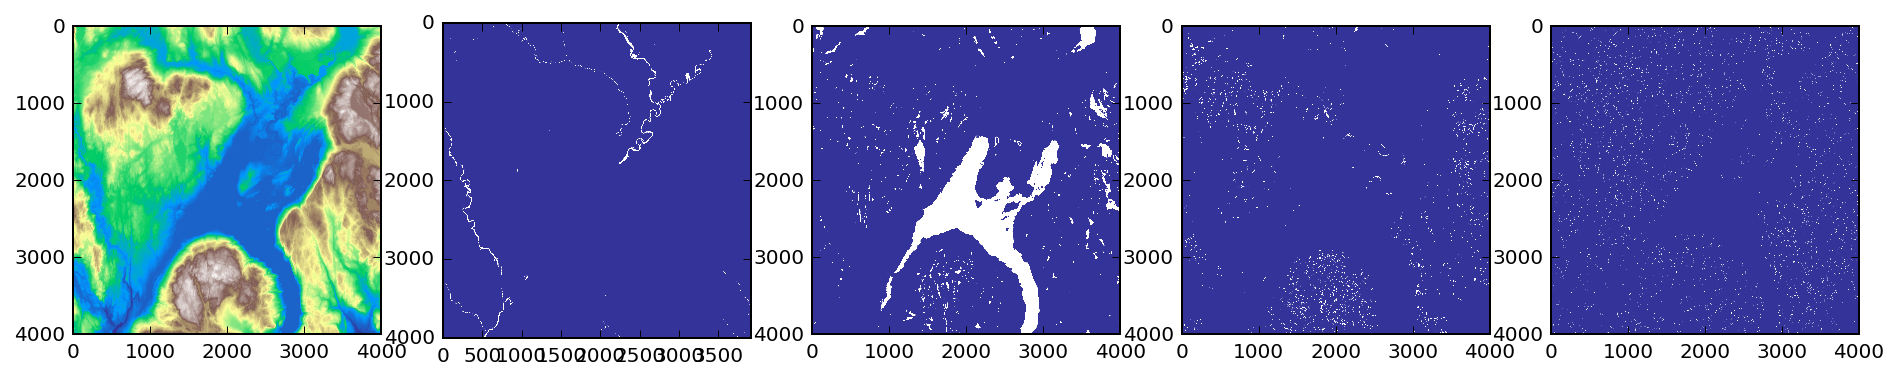

In [5]:
plt.figure()
plt.subplot(1,5,1)
previewGeotiff('anders_hoh.tiff')


plt.subplot(1,5,2)
previewGeotiff('anders_elvbekk.tiff')


plt.subplot(1,5,3)
previewGeotiff('anders_innsjo.tiff')


plt.subplot(1,5,4)
previewGeotiff('anders_myr.tiff')


plt.subplot(1,5,5)
previewGeotiff('anders_elvmidtlinje.tiff')

plt.show()

Opening out2.tiff
Geotiff size: (4002L, 4002L), extent: [209995.0, 250015.0, 6649985.0, 6690005.0]
Opening out2.tiff
Geotiff size: (4002L, 4002L), extent: [209995.0, 250015.0, 6649985.0, 6690005.0]


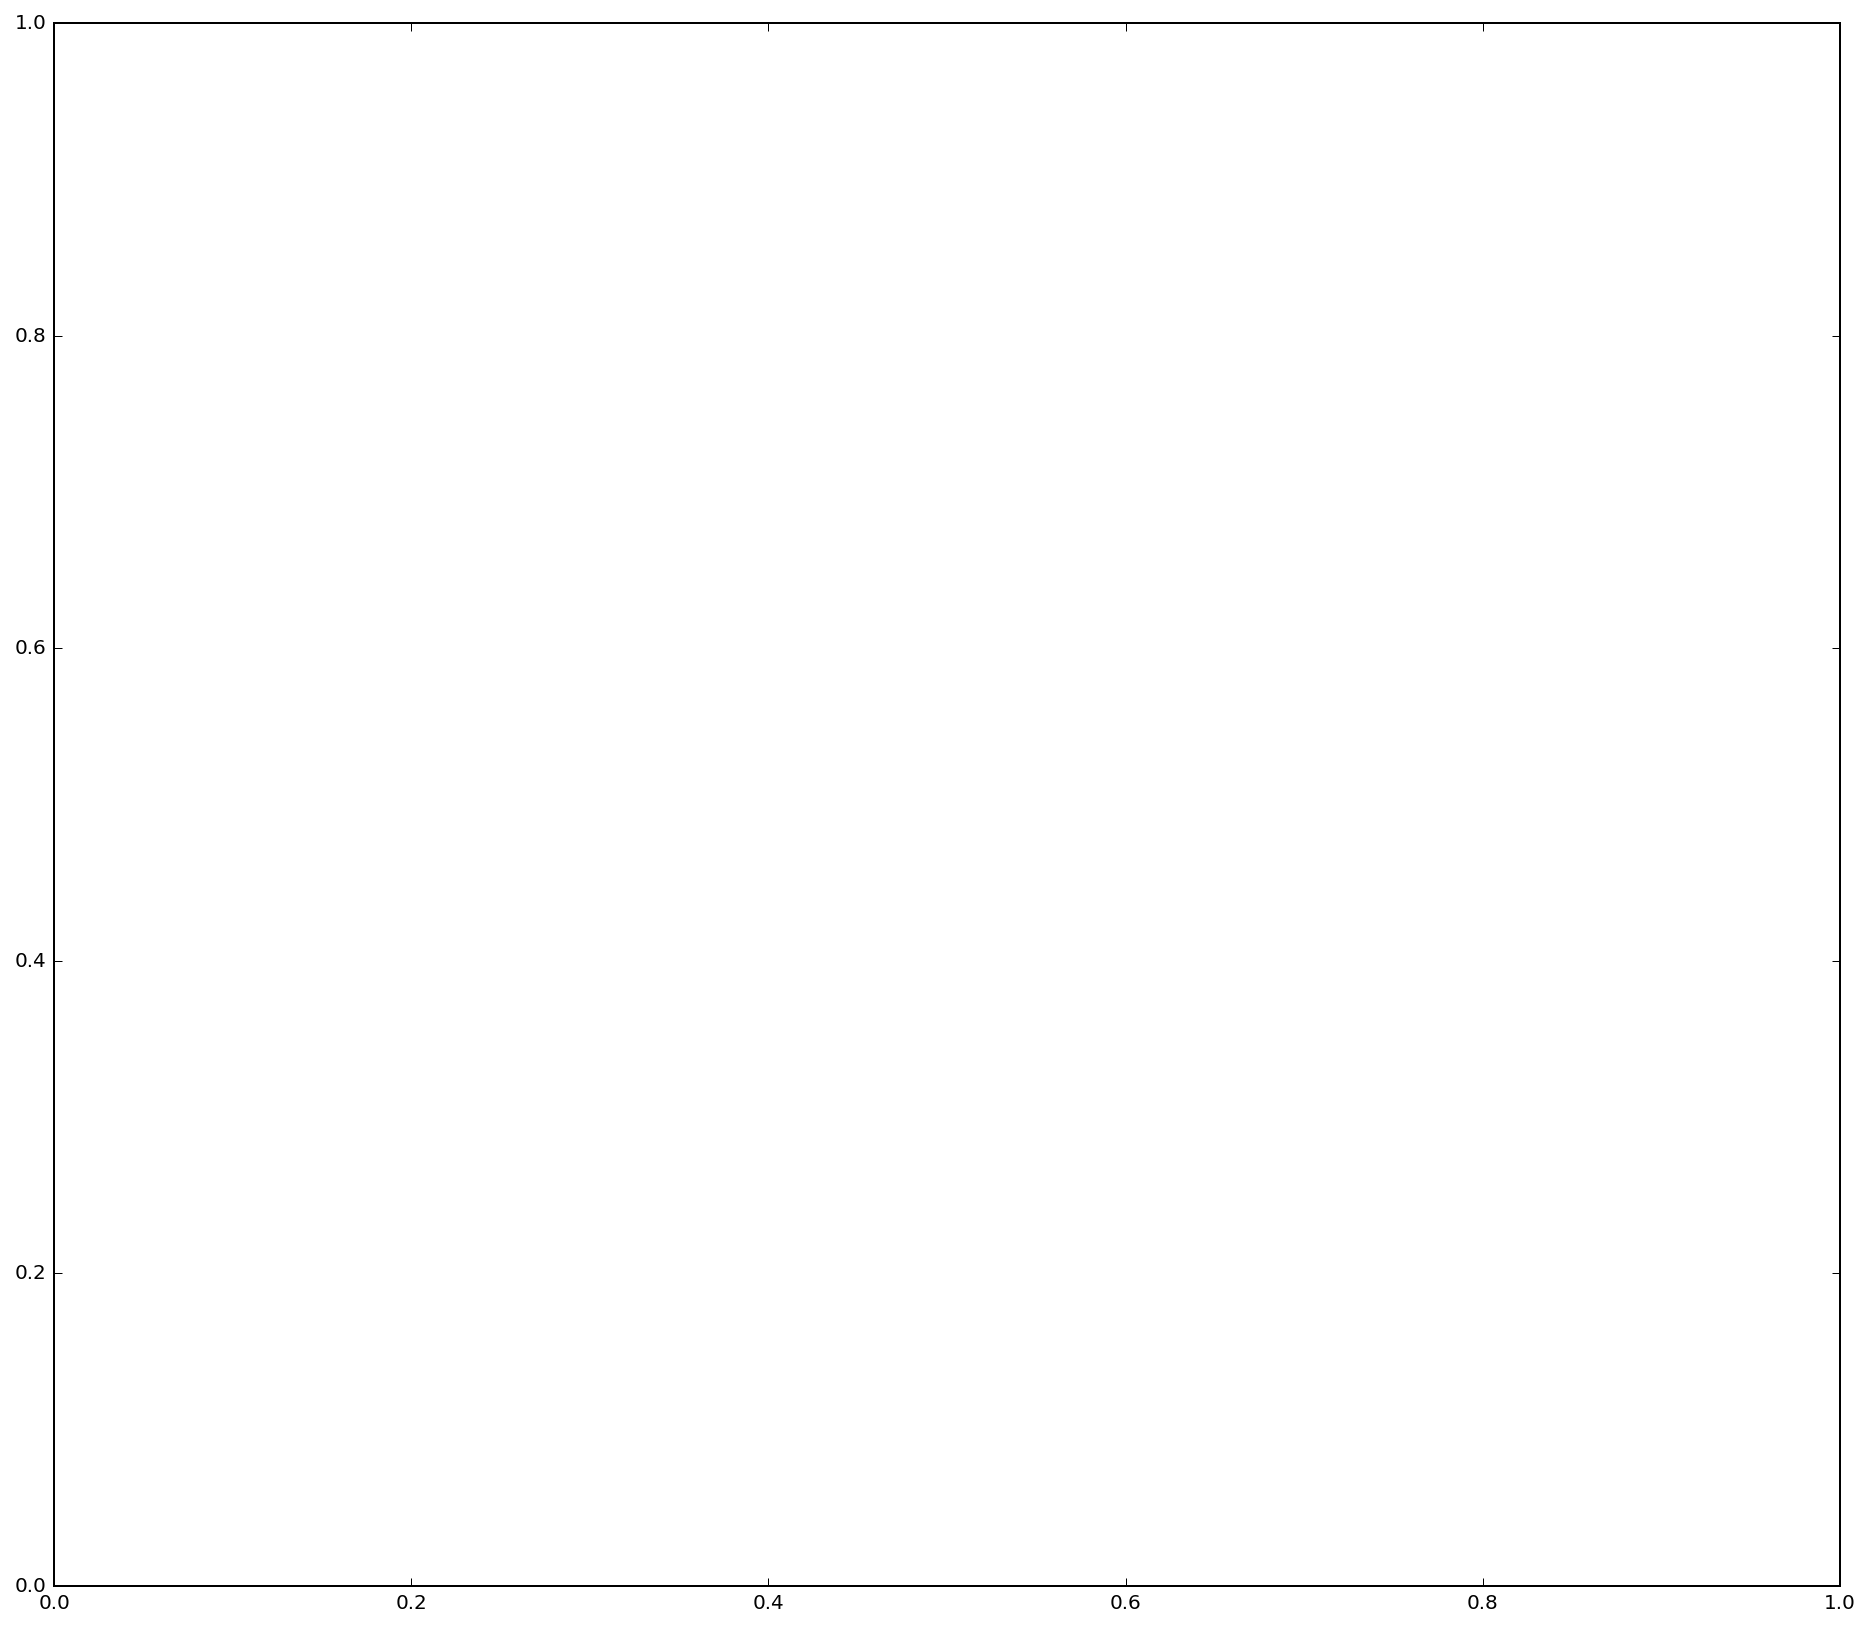

In [6]:
#arrElvebekk = loadGeotiffAsMaskedArray('anders_elvbekk.tiff', band = 1)
#arrElvemidtlinje = loadGeotiffAsMaskedArray('anders_elvmidtlinje.tiff', band = 1)

#previewArray(arrElvebekk + 2 * arrElvemidtlinje)
#sys.argv = ['anders_elvbekk.tiff', 'anders_elvmidtlinje.tiff']
#gm.main()
plt.subplot(1, 3, 1)
arr = loadGeotiffAsMaskedArray('out2.tiff', band = 1)
previewArray(arr)

plt.subplot(1, 3, 2)
arr = loadGeotiffAsMaskedArray('out2.tiff', band = 2)
previewArray(arr)

plt.subplot()





In [7]:
arrHoyde = loadGeotiffAsMaskedArray('anders_hoh.tiff', band = 1)
previewGeotiff()

Opening anders_hoh.tiff
Geotiff size: (4001L, 4001L), extent: [209995.0, 250005.0, 6649995.0, 6690005.0]


TypeError: previewGeotiff() takes exactly 1 argument (0 given)